In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [48]:
# graficos - configuración
sns.set_theme(style="whitegrid")
pd.set_option('display.width', 1000)

try:
    df = pd.read_excel("data/online_retail_II.xlsx")
    print("Archivo cargado exitosamente")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

print(df.head()) 
print(df.info()) # tipos de variables
print(df.describe().T.round(2)) # estadísticas descriptivas básica

Archivo cargado exitosamente
  Invoice StockCode                          Description  Quantity         InvoiceDate  Price  Customer ID         Country
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12 2009-12-01 07:45:00   6.95      13085.0  United Kingdom
1  489434    79323P                   PINK CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75      13085.0  United Kingdom
2  489434    79323W                  WHITE CHERRY LIGHTS        12 2009-12-01 07:45:00   6.75      13085.0  United Kingdom
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48 2009-12-01 07:45:00   2.10      13085.0  United Kingdom
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24 2009-12-01 07:45:00   1.25      13085.0  United Kingdom
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      52546

In [49]:
df_limpio = df[(df['Quantity'] > 0) & (df['Price'] > 0)].copy()

print(f"Registros originales: {df.shape[0]}")
print(f"Registros limpios: {df_limpio.shape[0]}")
print(f"Registros eliminados: {df.shape[0] - df_limpio.shape[0]}")

Registros originales: 525461
Registros limpios: 511566
Registros eliminados: 13895


In [50]:
# ajuste de tipo de datos, Customer ID e Invoice ahora son tipo String
df_limpio['Customer ID'] = df_limpio['Customer ID'].astype(str)
df_limpio['Invoice'] = df_limpio['Invoice'].astype(str)


In [51]:
print("--- ANÁLISIS DE NULOS ---")
print(df_limpio.isnull().sum())

df_limpio['Customer ID'] = df_limpio['Customer ID'].replace('nan', 'Guest')
df_limpio['Customer ID'] = df_limpio['Customer ID'].fillna('Guest')

df_limpio['Total_Venta'] = df_limpio['Quantity'] * df_limpio['Price']

guest_count = df_limpio[df_limpio['Customer ID'] == 'Guest'].shape[0]
print(f"\nNúmero de transacciones realizadas por invitados (Guest): {guest_count}")


venta_por_tipo = df_limpio.groupby(df_limpio['Customer ID'] == 'Guest')['Total_Venta'].sum()

print("\n--- IMPACTO ECONÓMICO ---")
print(f"Ventas de Usuarios Registrados: ${venta_por_tipo[False]:,.2f}")
print(f"Ventas de Usuarios Invitados (Guest): ${venta_por_tipo[True]:,.2f}")

# Cálculo del porcentaje
porcentaje_guest = (venta_por_tipo[True] / df_limpio['Total_Venta'].sum()) * 100
print(f"Los invitados representan el {porcentaje_guest:.2f}% de los ingresos totales.")

df_limpio[df_limpio['Customer ID'] == 'Guest']

--- ANÁLISIS DE NULOS ---
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

Número de transacciones realizadas por invitados (Guest): 103902

--- IMPACTO ECONÓMICO ---
Ventas de Usuarios Registrados: $8,832,003.27
Ventas de Usuarios Invitados (Guest): $1,474,262.32
Los invitados representan el 14.30% de los ingresos totales.


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Venta
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,Guest,United Kingdom,0.55
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,Guest,United Kingdom,0.85
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,Guest,United Kingdom,2.95
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,Guest,United Kingdom,15.00
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,Guest,United Kingdom,8.85
...,...,...,...,...,...,...,...,...,...
525143,538154,82599,FANNY'S REST STOPMETAL SIGN,1,2010-12-09 16:35:00,4.21,Guest,United Kingdom,4.21
525144,538154,84029E,RED WOOLLY HOTTIE WHITE HEART.,5,2010-12-09 16:35:00,8.47,Guest,United Kingdom,42.35
525145,538154,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,4,2010-12-09 16:35:00,8.47,Guest,United Kingdom,33.88
525146,538154,85099B,JUMBO BAG RED RETROSPOT,1,2010-12-09 16:35:00,4.21,Guest,United Kingdom,4.21


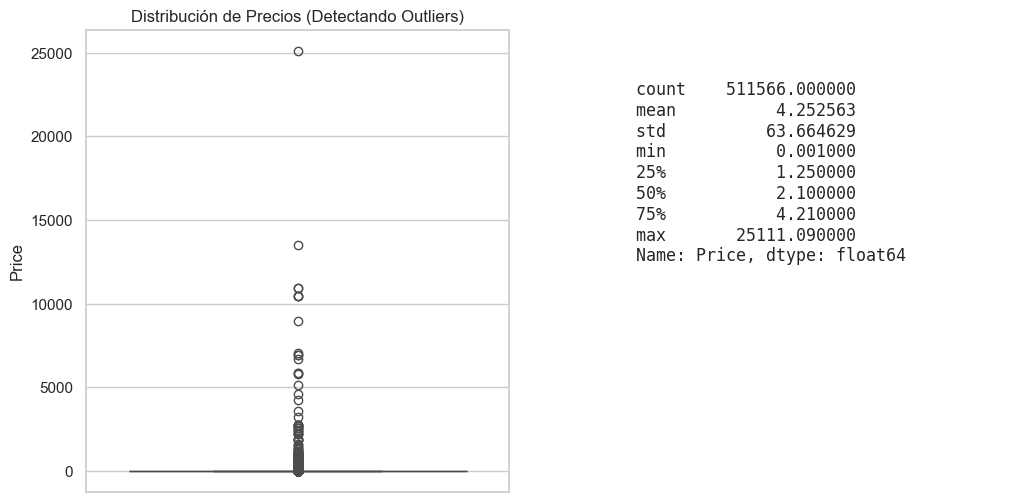

--- TOP 5 PRODUCTOS MÁS CAROS ---
       Description     Price Customer ID
241827      Manual  25111.09       Guest
517955  AMAZON FEE  13541.33       Guest
135015      Manual  10953.50       Guest
135013      Manual  10953.50     12918.0
372834      Manual  10468.80       Guest


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# tamaño del grafico
plt.figure(figsize=(12, 6))

# Subgráfico 1: Boxplot de Precios
plt.subplot(1, 2, 1) # (1 fila, 2 columnas, gráfico n°1)
sns.boxplot(y=df_limpio['Price'])
plt.title('Distribución de Precios (Detectando Outliers)')

# Subgráfico 2: Estadística descriptiva enfocada en el Precio
plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, str(df_limpio['Price'].describe()), fontsize=12, fontfamily='monospace')
plt.axis('off') # Apagamos los ejes porque es solo texto

plt.show()

# Vamos a investigar a los "culpables" de los precios altos
print("--- TOP 5 PRODUCTOS MÁS CAROS ---")
print(df_limpio.sort_values(by='Price', ascending=False).head(5)[['Description', 'Price', 'Customer ID']])


Tengo una distribución extremadamente sesgada por valores atipicos. La caja que representa el 50% de las ventas normales esta tan comprimido abajo que parece una linea plana. Python tiene que estirar el eje Y hasta $25000 para mostrar ese unico punto 'Manual'

A que se refiere con 'Manual'?
Esto suele ser un empleado corrigiendo un error de sistema manualmente. No es una venta real de un artiuclo y AMAZON FEE es un gasto por comisión que cobra Amazon, no es un ingreso por venta de producto. 

## Decisión: Valores Atipicos
La decisión es que para un análisis de comportamiento de compra y productos, estos registros son ruido. Si quiero saber que producto prefieren los clientes, no me sirve saber que se pago una comisión a Amazon. Debo eliminarlo para ver la realidad de las ventas minoristas. 

Entonces, creo una lista negra de codigos o descripciones que no son productos fisico y los filtro.

Filas antes de limpieza profunda: 511566
Filas con productos reales: 509509


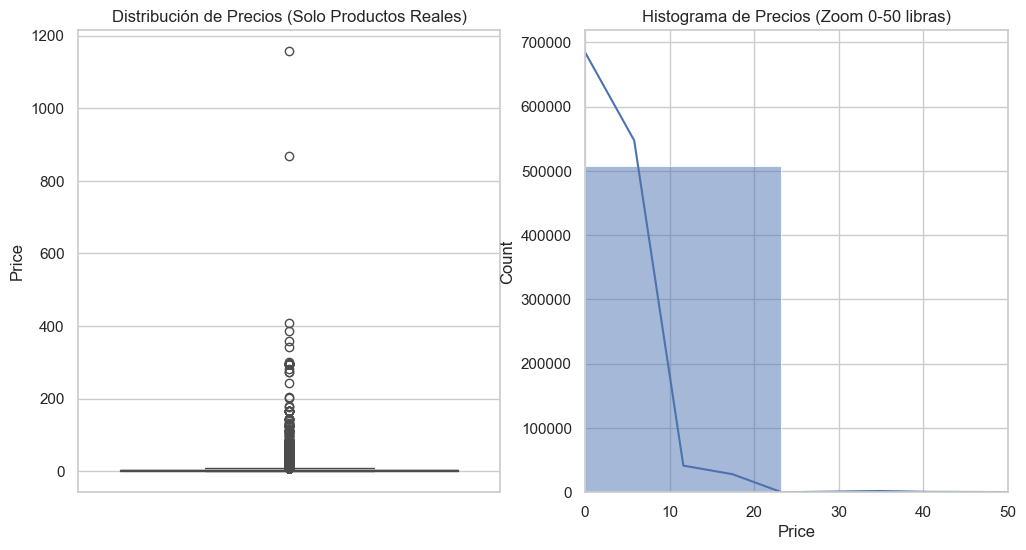

count    509509.00
mean          3.44
std           5.31
min           0.00
25%           1.25
50%           2.10
75%           4.21
max        1157.15
Name: Price, dtype: float64


In [53]:
# lista de descripciones a excluir
lista_negra = ['Manual', 'POST', 'DOTCOM POSTAGE', 'AMAZON FEE', 'BANK CHARGES', 'CRUK Commission', 'Discount']

df_minorista = df_limpio[
    (~df_limpio['Description'].isin(lista_negra)) & 
    (df_limpio['StockCode'] != 'POST') & # por si acaso
    (df_limpio['StockCode'] != 'D') &
    (df_limpio['Price'] < 3000) # precio máximo razonable, deducido a partir de la ultima visualización
].copy()

print(f"Filas antes de limpieza profunda: {df_limpio.shape[0]}")
print(f"Filas con productos reales: {df_minorista.shape[0]}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_minorista['Price'])
plt.title('Distribución de Precios (Solo Productos Reales)')

plt.subplot(1, 2, 2)
sns.histplot(df_minorista['Price'], bins=50, kde=True)
plt.xlim(0, 50) # zoom solo a los productos de 0 a 50 libras para ver mejor
plt.title('Histograma de Precios (Zoom 0-50 libras)')

plt.show()

print(df_minorista['Price'].describe().round(2))

## Análisis
La inmensa mayoria de los productos de esta tienda cuestan menos de £5.
A medida que se mueve la linea azul hacia la derecha, (precios más caros de £10, £20), la misma comienza a desaparecer, es decir ,que hay muy pocos productos caros.
La linea azul, simula un tobogan, a esto se le llama sesgo a la derecha, o asimetria positiva. Esto es asi porque los precios caros que casi no se ven pero existen se arrastran hacia la derecha.

Como conclusión, el histograma revela la estrategia de precios de la empresa es de volumen de bajo costo. No es una tienda de lujo. El 90% del catalogo se concentra en articulos de compra impulsiva(menos de £5). La curva sesgada indica que los productos caros son anomalias en el modelo de negocio. 

## Segmentación
Ahora ya se que tengo muchos productos baratos y pocos caros. Entonces la pregunta de negocio ahora seria: Se gana dinero vendiendo muchas cosas baratas o pocas cosas caras?. Teniendo en cuenta el principio de pareto, trabajaremos a continuación. 

/var/folders/ym/qm2drp3n5pn868m2sfvz31jm0000gn/T/ipykernel_3684/577962867.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)


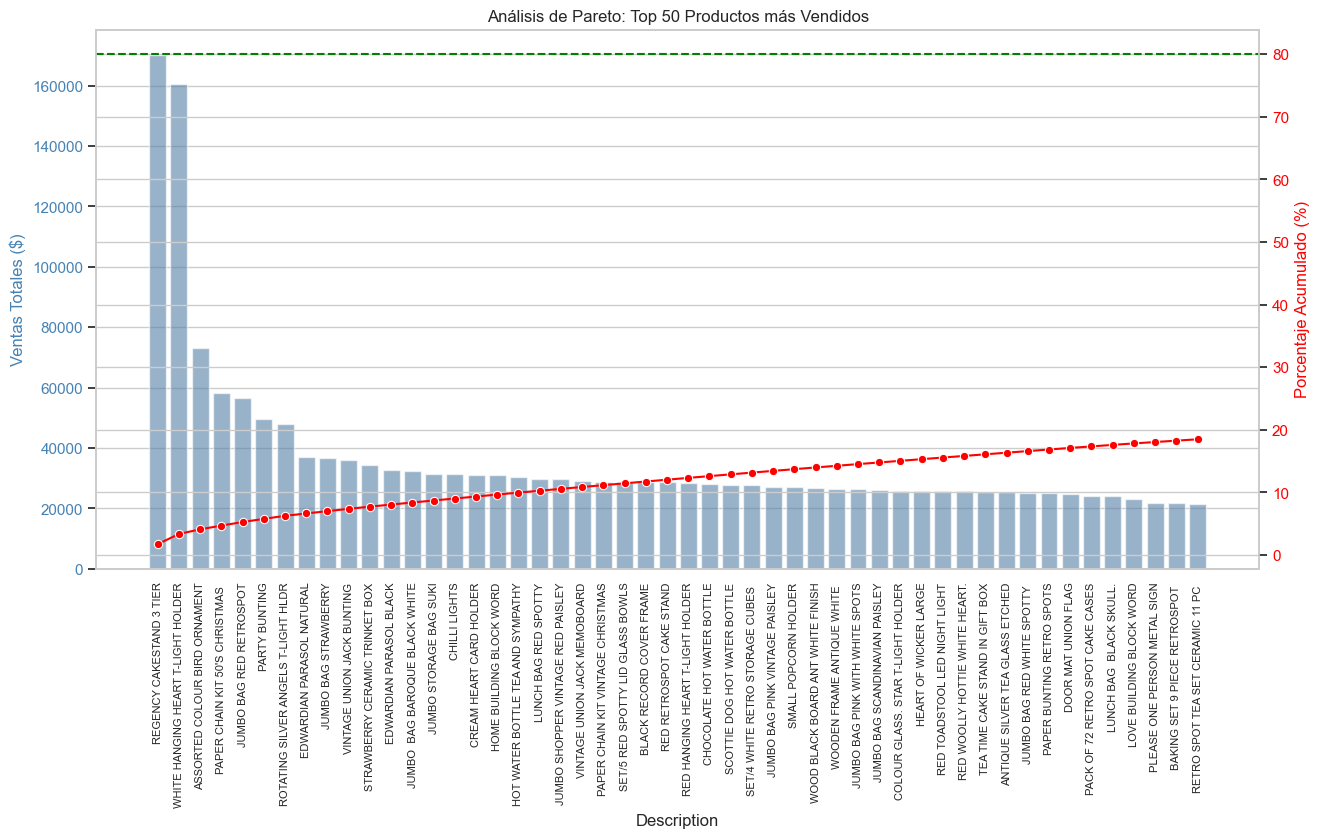

--- TOP 5 PRODUCTOS ESTRELLA ---
                                    Total_Venta  porcentaje_acumulado
Description                                                          
REGENCY CAKESTAND 3 TIER              170078.51              1.726401
WHITE HANGING HEART T-LIGHT HOLDER    160630.78              3.356901
ASSORTED COLOUR BIRD ORNAMENT          73092.99              4.098840
PAPER CHAIN KIT 50'S CHRISTMAS         58189.25              4.689496
JUMBO BAG RED RETROSPOT                56595.51              5.263975


In [54]:
# agrupo por producto y sumo cuanto dinero genero cada uno
producto_rendimiento = df_minorista.groupby('Description')['Total_Venta'].sum().sort_values(ascending=False)

# lo paso a dataframe
pareto_df = pd.DataFrame(producto_rendimiento)

# calculo el porcentaje acumulado, entonces, cuanto representa el primer producto del total? Y el primero + el segundo?
pareto_df['porcentaje_acumulado'] = 100 * (pareto_df['Total_Venta'].cumsum() / pareto_df['Total_Venta'].sum())

# comienzo el grafico, me quedo solo con los top 50 productos
pareto_top50 = pareto_df.head(50)
fig, ax1 = plt.subplots(figsize=(15, 7)) # grafico de pareto

# barras de ventas totales
sns.barplot(x=pareto_top50.index, y=pareto_top50['Total_Venta'], ax=ax1, color='steelblue', alpha=0.6)
ax1.set_ylabel('Ventas Totales ($)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=8)

# lineas de porcentajes acumulados
ax2 = ax1.twinx() # Creamos un segundo eje Y que comparte el mismo eje X
sns.lineplot(data=pareto_top50['porcentaje_acumulado'], ax=ax2, color='red', marker='o', sort=False)
ax2.set_ylabel('Porcentaje Acumulado (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Línea de referencia del 80% (Punto clave de Pareto)
ax2.axhline(80, color='green', linestyle='--')

plt.title('Análisis de Pareto: Top 50 Productos más Vendidos')
plt.show()

print("--- TOP 5 PRODUCTOS ESTRELLA ---")
print(pareto_df.head(5))


## Análisis
Estos Top 50 productos representan aproximadamente el 20% de los ingresos totales. Los dos productos estrella son el Soporte para Pasteles (Cakestand) y el Portavelas Corazón (Heart T-Light). No deben de faltar en stock. Si la empresa se queda sin ellos, perderá ingresos significativos. Hay que negociar en lo posible precios preferenciales con los proveedores de estos dos items

Analizando la linea roja puedo ver que esta sube muy lentamente, esto significa que no se depende de pocos productos para llegar a la cuota de ventas. Por ejemplo, a diferencia de Apple (que depende casi todo del iPhone), esta tienda es como Amazon: gana dinero vendiendo poquito de muchas cosas diferentes

No se debe de eliminar lo que se vende poco, porque la suma de esos miles de productos pequeños constituye el 80% de la facturación de la empresa, el resto no se ve en gráfico. 

## Pregunta de negocio
"El gerente de ventas cree que el mercado de Alemania (Germany) gasta más en promedio por transacción que el mercado de Francia (France). ¿Es esto verdad o es solo una suposición?"

Para responder esto, realizare pruebas de hipotesis (T-Test) para ver si la diferencia es estadisticamente significativa o solamente suerte

/var/folders/ym/qm2drp3n5pn868m2sfvz31jm0000gn/T/ipykernel_3684/68334814.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Francia', 'Alemania'])


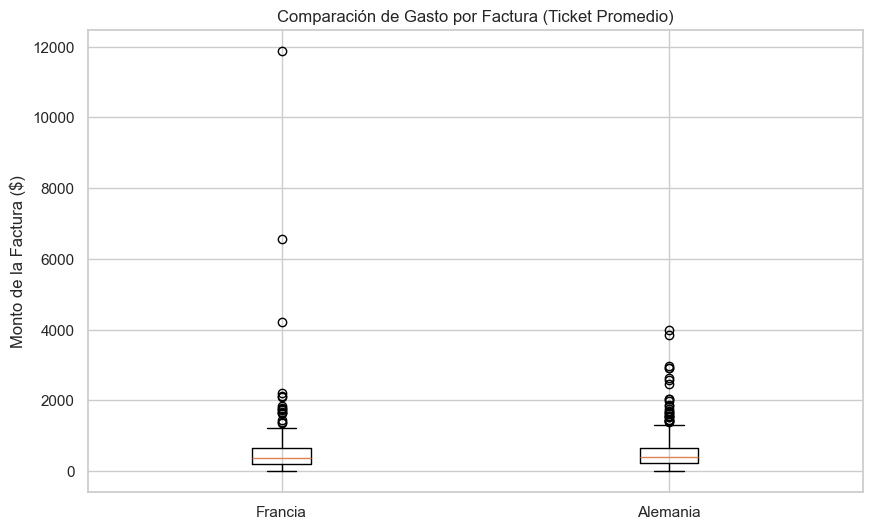

Media de Francia: $576.66
Media de Alemania: $559.12
------------------------------------------------------
Estadístico T: 0.2459
Valor P (P-Value): 0.8059

❌ CONCLUSIÓN: No podemos rechazar la Hipótesis Nula.
La diferencia observada podría ser pura casualidad. No hay pruebas de que un país gaste más que el otro.


In [55]:
import scipy.stats as stats

# uso  'Invoice' para agrupar, porque quiero el gasto POR TICKET (por compra), no por producto
basket_fr = df_minorista[df_minorista['Country'] == 'France'].groupby('Invoice')['Total_Venta'].sum()
basket_ge = df_minorista[df_minorista['Country'] == 'Germany'].groupby('Invoice')['Total_Venta'].sum()

plt.figure(figsize=(10, 6))

# creo una lista combinada solo para graficar
data_to_plot = [basket_fr, basket_ge]
plt.boxplot(data_to_plot, labels=['Francia', 'Alemania'])
plt.title('Comparación de Gasto por Factura (Ticket Promedio)')
plt.ylabel('Monto de la Factura ($)')
plt.show()

print(f"Media de Francia: ${basket_fr.mean():.2f}")
print(f"Media de Alemania: ${basket_ge.mean():.2f}")
print("------------------------------------------------------")

t_stat, p_value = stats.ttest_ind(basket_fr, basket_ge, equal_var=False) # equal_var=False aplica la corrección de Welch (más robusta)

print(f"Estadístico T: {t_stat:.4f}")
print(f"Valor P (P-Value): {p_value:.4f}")

if p_value < 0.05:
    print("\n✅ CONCLUSIÓN: Rechazamos la Hipótesis Nula.")
    print("Hay una diferencia ESTADÍSTICAMENTE SIGNIFICATIVA entre el gasto de Francia y Alemania.")
else:
    print("\n❌ CONCLUSIÓN: No podemos rechazar la Hipótesis Nula.")
    print("La diferencia observada podría ser pura casualidad. No hay pruebas de que un país gaste más que el otro.")

## Pregunta de Negocio
"Si un cliente YA puso el Soporte de Pasteles (A) en su carrito, ¿cuál es la probabilidad de que TAMBIÉN compre el Portavelas (B)?"

In [56]:
producto_A = 'REGENCY CAKESTAND 3 TIER'
producto_B = 'WHITE HANGING HEART T-LIGHT HOLDER'

facturas_con_A = set(df_minorista[df_minorista['Description'] == producto_A]['Invoice'])
facturas_con_B = set(df_minorista[df_minorista['Description'] == producto_B]['Invoice'])

facturas_con_ambos = facturas_con_A & facturas_con_B # El operador '&' busca los elementos que existen en ambos conjuntos

n_A = len(facturas_con_A)            # Total veces que se vendió A
n_ambos = len(facturas_con_ambos)    # Total veces que se vendieron juntos

# Probabilidad Condicional: P(B | A) = Casos Favorables (Ambos) / Casos Totales (A)
probabilidad_B_dado_A = (n_ambos / n_A) * 100

print(f"--- ANÁLISIS DE ASOCIACIÓN (BAYESIANO) ---")
print(f"Total transacciones con '{producto_A}': {n_A}")
print(f"Total transacciones donde TAMBIÉN compraron '{producto_B}': {n_ambos}")
print(f"Probabilidad de Compra Cruzada: {probabilidad_B_dado_A:.2f}%")

# ¿Qué tan probable es comprar B en general, sin importar A?
total_facturas = df_minorista['Invoice'].nunique()
prob_base_B = (len(facturas_con_B) / total_facturas) * 100

print(f"Probabilidad Base de comprar '{producto_B}' (General): {prob_base_B:.2f}%")

# Cuántas veces aumenta la probabilidad gracias a la condición A
lift = probabilidad_B_dado_A / prob_base_B
print(f"\nMETRICA LIFT: {lift:.2f}x")



--- ANÁLISIS DE ASOCIACIÓN (BAYESIANO) ---
Total transacciones con 'REGENCY CAKESTAND 3 TIER': 2019
Total transacciones donde TAMBIÉN compraron 'WHITE HANGING HEART T-LIGHT HOLDER': 429
Probabilidad de Compra Cruzada: 21.25%
Probabilidad Base de comprar 'WHITE HANGING HEART T-LIGHT HOLDER' (General): 16.05%

METRICA LIFT: 1.32x


In [59]:
# 1. Inicializamos la columna vacía (o con ceros)
df_ab['Compro'] = 0

# 2. Llenamos SOLO las filas del Grupo A
# Filtramos dónde están las filas A
filtro_A = df_ab['Grupo'] == 'A'
# Calculamos cuántas son
n_A = filtro_A.sum()
# Insertamos los datos simulados solo en esas filas usando .loc
df_ab.loc[filtro_A, 'Compro'] = np.random.binomial(1, tasa_base, size=n_A)

# 3. Llenamos SOLO las filas del Grupo B
filtro_B = df_ab['Grupo'] == 'B'
n_B = filtro_B.sum()
# Insertamos los datos (con la mejora del cupón)
df_ab.loc[filtro_B, 'Compro'] = np.random.binomial(1, tasa_base + efecto_cupon, size=n_B)

# ------------------------
# A partir de aquí sigue el resto del código igual (resumen y Z-Test)...
# Copia y pega esto también para ejecutar todo junto:

# 4. Análisis de Resultados Observados
resumen = df_ab.groupby('Grupo')['Compro'].agg(['count', 'sum', 'mean'])
resumen.columns = ['Total Clientes', 'Clientes que Compraron', 'Tasa de Conversión']
print("--- RESULTADOS OBSERVADOS (SIMULACIÓN) ---")
print(resumen)

# 5. La Prueba de Fuego: Z-Test
conversiones = [resumen.loc['B', 'Clientes que Compraron'], resumen.loc['A', 'Clientes que Compraron']]
total_muestras = [resumen.loc['B', 'Total Clientes'], resumen.loc['A', 'Total Clientes']]

z_stat, p_value = proportions_ztest(conversiones, total_muestras)

print(f"\n--- VALIDACIÓN ESTADÍSTICA (Z-TEST) ---")
print(f"Estadístico Z: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ EL TEST ES EXITOSO: La mejora es estadísticamente significativa. ¡Lanzamos la campaña!")
else:
    print("❌ EL TEST NO ES CONCLUYENTE: La diferencia podría ser casualidad. No lanzamos.")

--- RESULTADOS OBSERVADOS (SIMULACIÓN) ---
       Total Clientes  Clientes que Compraron  Tasa de Conversión
Grupo                                                            
A                2144                     342            0.159515
B                2153                     375            0.174176

--- VALIDACIÓN ESTADÍSTICA (Z-TEST) ---
Estadístico Z: 1.2888
P-Value: 0.1975
❌ EL TEST NO ES CONCLUYENTE: La diferencia podría ser casualidad. No lanzamos.
